In [1]:
import networkx as nx
from tqdm.notebook import tqdm
import json
from typing import List
import os
import glob
import matplotlib.pyplot as plt

seed = 123

In [2]:
class SetEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, set):
            return list(obj)
        return json.JSONEncoder.default(self, obj)


def save(G, label, fpath):
    data = nx.node_link_data(G)
    data['label'] = label
    with open(fpath, 'w') as f:
        json.dump(data, f, cls=SetEncoder)   


def load(fpath):
    data = json.load(open(fpath))
    label = data["label"]
    del data["label"]
    G = nx.node_link_graph(data)
    return G, label

In [3]:
def generate_random_regular_graphs(
    degrees: List, number_of_nodes, number_of_graphs, directory="./regular_graphs"
) -> None:
    """
    This function generates balanced dataset
    that consists of len(degrees)*number_of_graphs
    random regular graphs.
    
    Args:
        degrees: a list of degrees of nodes in respectful classes
        number_of_nodes: the number of graph vertices in all classes
        number_of_graphs: number of graphs in each class
        directory: output directory
    """
    graphs = []
    labels = []
    counter = 0
    
    if not os.path.exists(directory):
        os.makedirs(directory)

    for d in tqdm(degrees):
        for i in tqdm(range(number_of_graphs)):
            counter += 1
            G = nx.random_regular_graph(
                d=d,
                n=number_of_nodes,
                seed=seed
            )
            save(G=G, label=d, fpath=f'{directory}/{counter}.json')
            
            
def generate_partition_graphs(
    sizes: List[List], p_in: float, p_out: float, number_of_graphs: int, directory: str = "./partition_graphs"
) -> None:
    """
    This function generates balanced dataset
    that consists of len(degrees)*number_of_graphs
    random partition graphs.
    
    Args:
        sizes: sizes of groups
        p_in: probability of edges within groups
        p_out: probability of edges between groups
        number_of_graphs: number of graphs in each class
        directory: output directory
    """
    
    assert p_in >= 0 and p_in <= 1
    assert p_out >= 0 and p_out <= 1
    
    graphs = []
    labels = []
    counter = 0
    
    if not os.path.exists(directory):
        os.makedirs(directory)

    for s in tqdm(sizes):
        for i in tqdm(range(number_of_graphs)):
            counter += 1
            G = nx.random_partition_graph(
                s, p_in, p_out
            )
            save(G=G, label=s[0], fpath=f'{directory}/{counter}.json')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

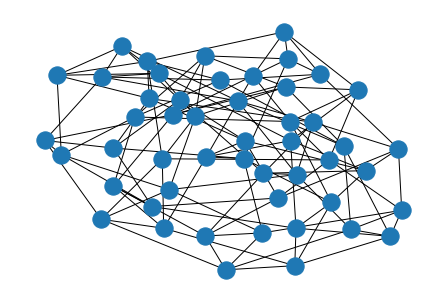

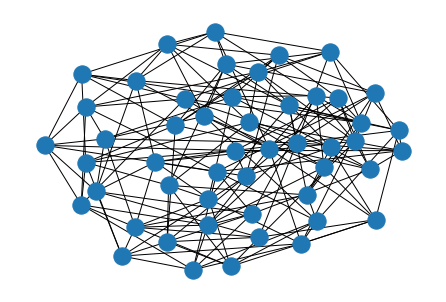

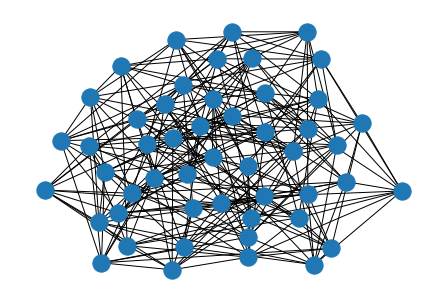

In [4]:
# Test 1.
generate_random_regular_graphs(degrees=[5, 7, 10], number_of_nodes=50, number_of_graphs=1)

directory = "./regular_graphs"

for fpath in tqdm(glob.glob(f"{directory}/*.json")):
    G, label = load(fpath)
    nx.draw(G)
    plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

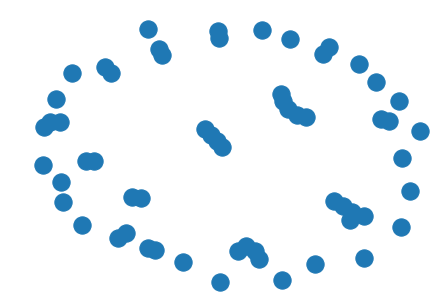

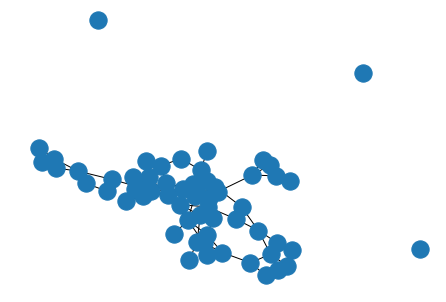

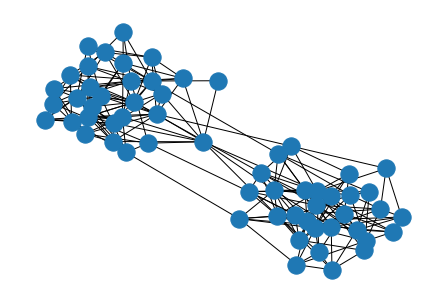

In [5]:
# Test 2.
communities = [
    [2] * 30,
    [10] * 6,
    [30] * 2
]
directory = "./partition_graphs"

generate_partition_graphs(sizes=communities, p_in=0.25, p_out=0.01, number_of_graphs=1)

for fpath in tqdm(glob.glob(f"{directory}/*.json")):
    G, label = load(fpath)
    nx.draw(G)
    plt.show()